## iPhone Sales - ANOVA

In [1]:
import numpy as np

In [57]:
a = np.array([25, 25, 27, 30, 23, 20])
b = np.array([30, 30, 21, 24, 26, 28])
c = np.array([18, 30, 29, 29, 24, 26])

# Step 1: Compute the individual means.
m1 = a.mean()
m2 = b.mean()
m3 = c.mean()

print(m1, m2, m3)

25.0 26.5 26.0


In [58]:
## Step 2: Compute the overall mean
m_o = (m1 + m2 + m3)/3
m_o

25.833333333333332

In [59]:
## Step 3: Compute the between groups variance
ssb = len(a) * (m1-m_o)**2 + len(b) * (m2-m_o)**2 + len(c) * (m3-m_o)**2

In [60]:
ssb

6.999999999999999

In [61]:
df_between_groups = 3 - 1 # number of groups - 1

In [62]:
msb = ssb / df_between_groups
msb

3.4999999999999996

In [63]:
ssw = 0
ssw_a = ((a - m1)**2).sum()
ssw_b = ((b - m2)**2).sum()
ssw_c = ((c - m3)**2).sum()
ssw = ssw_a + ssw_b + ssw_c
ssw

223.5

In [64]:
df_within_groups = 18 - 3 # total number of observations - the number of groups
msw = ssw / df_within_groups
msw

14.9

In [65]:
f_ratio = msb / msw
f_ratio

0.23489932885906037

In [66]:
## Calculating the p-value
from scipy.stats import f

# dfn - the between group degrees of freedom
# dfd - wthe within groups degrees of freedom
p_value = 1 - f.cdf(f_ratio, dfn=df_between_groups, dfd=df_within_groups)
p_value

0.7935046627328333

In [67]:
from scipy.stats import f_oneway # The function for one-way ANOVA
f_oneway(a, b, c)

F_onewayResult(statistic=0.2348993288590604, pvalue=0.793504662732833)

In [68]:
## Critical value
cv = f.ppf(0.95, dfn=df_between_groups, dfd=df_within_groups)
cv

3.6823203436732412

In [69]:
## Applying the levene test to check if variances are equal
from scipy.stats import levene

In [70]:
# H0: The variances of the groups are equal
# Ha: At least one sample has a different variance from the others
levene(a, b, c)

LeveneResult(statistic=0.24725274725274726, pvalue=0.7840640479547496)

In [71]:
## If any assumption of ANOVA fails, we go for the kruskal-wallis test
from scipy.stats import kruskal

# H0: m1 = m2 = m3
# Ha: at least one mean is different
kruskal(a, b, c)

KruskalResult(statistic=0.6794066317626576, pvalue=0.7119815250421468)

## Covariance - Heights and Weights

In [73]:
from matplotlib import pyplot as plt

[[16.88888889 22.66666667]
 [22.66666667 60.44444444]]
Var x:  16.88888888888889
Var y:  60.44444444444444


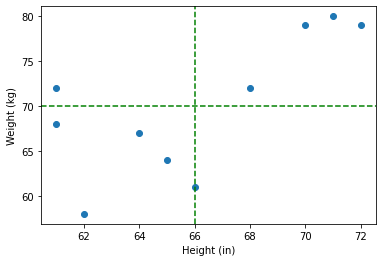

In [74]:
heights = np.array([68, 62, 64, 61, 70, 66, 61, 65, 71, 72])
weights = np.array([72, 58, 67, 72, 79, 61, 68, 64, 80, 79])

plt.scatter(x=heights, y=weights)

plt.axvline(heights.mean(), color="g", linestyle="--")
plt.axhline(weights.mean(), color="g", linestyle="--")

plt.xlabel("Height (in)")
plt.ylabel("Weight (kg)")

x = heights
y = weights

print(np.cov(x, y))

print("Var x: ", x.var(ddof=1))
print("Var y: ", y.var(ddof=1))